# Remarks

* Data normalization
    * Mobilenet expects data from -1 to 1
        * Normalize Input Data or Include in Model
        * TFLite Conversion must fit according to decision
    * Ground Truth Data: for better inspection Data multiplied by 80. Undo the change in the Data Input Pipeline
* Overview in Tutorials:
    * tf.function
* Idea

# Libraries

In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import visualize, tools

config_directory = 'edge'

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(Model.cfg["INPUT_SHAPE"], Model.cfg["OUTPUT_SHAPE"], config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-11-22 18:08:28.679465: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 18:08:30.154303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 18:08:30.166079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-22 18:08:30.166103: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tenso

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 303 images.
The TEST DS contains 300 images.


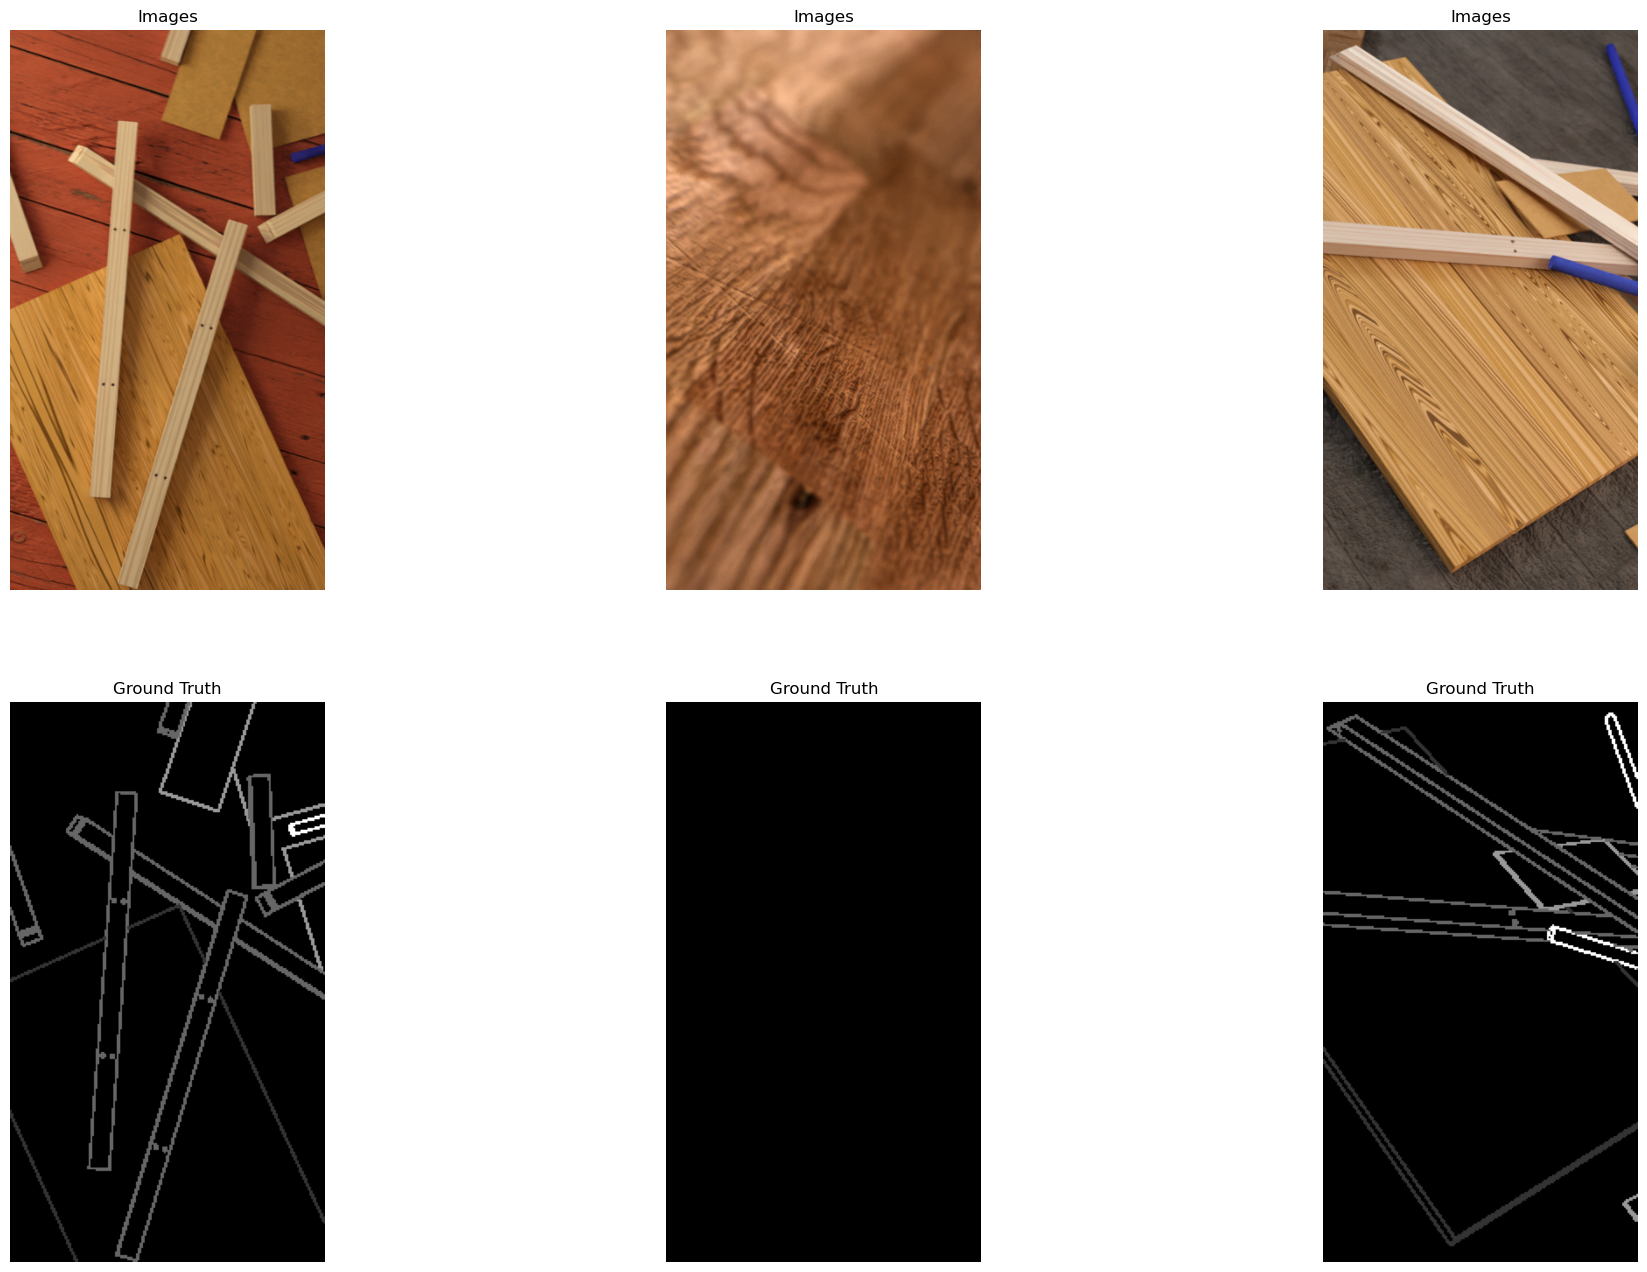

In [2]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

if Model.train_model:
    for inp, out in train_ds.take(1):
        visualize.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                             batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                             num_classes=DataProcessing.num_classes['edge'])

# Define, Compile and Train Model

In [3]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics())

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=test_ds, callbacks=Model.get_callbacks())

model = Model.get_best_model_from_checkpoints()

(640, 360, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 640, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_model (Functional)        [(None, 320, 180, 8  15664       ['in_img[0][0]']                 
                                ),                                                                
                                 (None, 160, 90, 8)                                               
                                , (None, 80, 45, 16                                               
                                )]                                              

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=186.33-epoch=5.00-f1=0.2467/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=186.33-epoch=5.00-f1=0.2467/assets


101/101 [==============================] - 41s 408ms/step - loss: 180.4894 - accuracy_edges: 0.8945 - f1: 0.3210 - precision: 0.2090 - recall: 0.6931 - val_loss: 186.3271 - val_accuracy_edges: 0.8312 - val_f1: 0.2467 - val_precision: 0.1462 - val_recall: 0.7905
Epoch 6/120
101/101 [==============================] - 34s 338ms/step - loss: 165.4741 - accuracy_edges: 0.8982 - f1: 0.3078 - precision: 0.1958 - recall: 0.7283 - val_loss: 159.0018 - val_accuracy_edges: 0.8761 - val_f1: 0.2825 - val_precision: 0.1727 - val_recall: 0.7753
Epoch 7/120
101/101 [==============================] - 35s 348ms/step - loss: 150.8379 - accuracy_edges: 0.8990 - f1: 0.3438 - precision: 0.2250 - recall: 0.7295 - val_loss: 140.3776 - val_accuracy_edges: 0.9228 - val_f1: 0.4003 - val_precision: 0.2785 - val_recall: 0.7114
Epoch 8/120
101/101 [==============================] - 35s 346ms/step - loss: 138.8295 - accuracy_edges: 0.9026 - f1: 0.3583 - precision: 0.2344 - recall: 0.7622 - val_loss: 130.7929 - val_a

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=119.04-epoch=10.00-f1=0.3817/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=119.04-epoch=10.00-f1=0.3817/assets


101/101 [==============================] - 42s 420ms/step - loss: 127.7929 - accuracy_edges: 0.9073 - f1: 0.3712 - precision: 0.2461 - recall: 0.7563 - val_loss: 119.0401 - val_accuracy_edges: 0.9073 - val_f1: 0.3817 - val_precision: 0.2529 - val_recall: 0.7774
Epoch 11/120
101/101 [==============================] - 36s 356ms/step - loss: 121.9743 - accuracy_edges: 0.9055 - f1: 0.3532 - precision: 0.2299 - recall: 0.7700 - val_loss: 118.6530 - val_accuracy_edges: 0.9050 - val_f1: 0.3731 - val_precision: 0.2470 - val_recall: 0.7628
Epoch 12/120
101/101 [==============================] - 35s 348ms/step - loss: 116.8823 - accuracy_edges: 0.9084 - f1: 0.3781 - precision: 0.2499 - recall: 0.7803 - val_loss: 112.8118 - val_accuracy_edges: 0.9232 - val_f1: 0.4195 - val_precision: 0.2905 - val_recall: 0.7541
Epoch 13/120
101/101 [==============================] - 35s 348ms/step - loss: 110.6810 - accuracy_edges: 0.9004 - f1: 0.3776 - precision: 0.2444 - recall: 0.8318 - val_loss: 105.9806 - va

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=100.57-epoch=15.00-f1=0.4038/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/test/TEST/CKPT/ckpt-loss=100.57-epoch=15.00-f1=0.4038/assets


101/101 [==============================] - 42s 414ms/step - loss: 103.7630 - accuracy_edges: 0.9041 - f1: 0.4046 - precision: 0.2658 - recall: 0.8469 - val_loss: 100.5695 - val_accuracy_edges: 0.9013 - val_f1: 0.4038 - val_precision: 0.2639 - val_recall: 0.8599
Epoch 16/120
101/101 [==============================] - ETA: 0s - loss: 106.6209 - accuracy_edges: 0.9018 - f1: 0.3909 - precision: 0.2567 - recall: 0.8229

KeyboardInterrupt: 

# Plot Results

In [5]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy_edges", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    visualize.plot_training_results(res=history.history, losses=plot_losses, metrics=plot_metrics,
                                    save=Model.cfg["SAVE"], path=path)

NameError: name 'history' is not defined

1/1 [==============================] - 1s 501ms/step


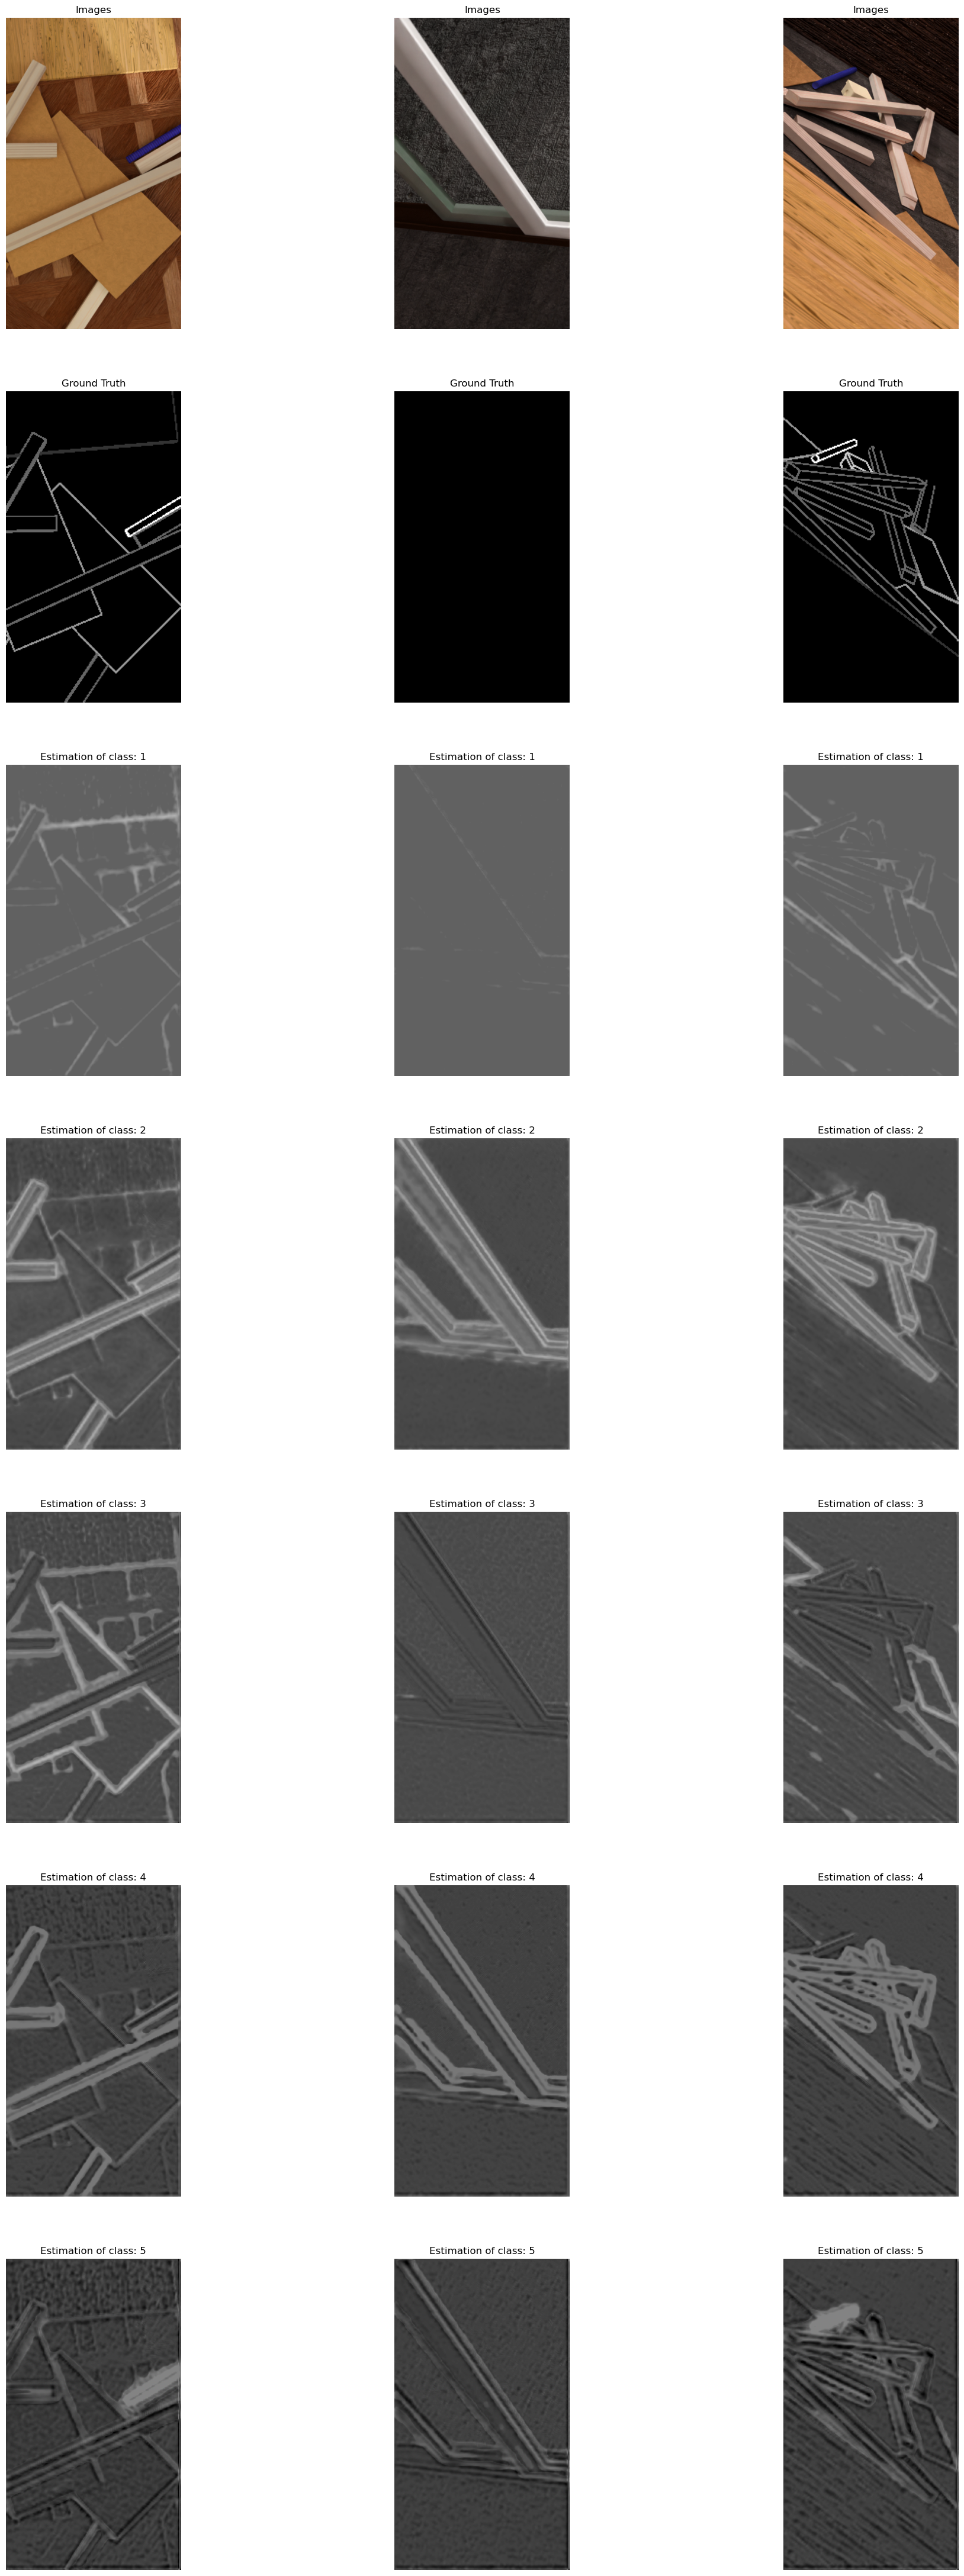

In [6]:
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    visualize.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                         predictions=pred,
                         batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                         num_classes=DataProcessing.num_classes['edge'])

In [ ]:
### Maximum F1 Score:
# TODO: FAILS right now: fix
# if not TRAIN_MODEL:
#     step_width = 0.05
#     threshold_range = [0.05, 0.95]
#     threshold_array = np.arange(threshold_range[0], threshold_range[1] + step_width, step_width)
#     threshold_array = np.array([0.025, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 0.975])
#
#     path_metrics_evaluation_plot = os.path.join(ModelFiles.paths["FIGURES"], "threshold_metrics_evaluation_test_ds.svg")
#     threshold_f1_max = visualize.plot_threshold_metrics_evaluation_class(model=model, ds=test_ds,
#                                                                          num_classes=DataProcessing.num_classes['EDGE'],
#                                                                          threshold_array=threshold_array,
#                                                                          threshold_edge_width=0, save=Model.cfg["SAVE"],
#                                                                          path=path_metrics_evaluation_plot)

# Fine Tuning

# Evaluate on Test DS of Real Images

## Metrics Evaluation

## Visual Results

# Save Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=Model.get_loss_function(),
              metrics=Model.get_metrics())

if Model.cfg["SAVE"]:
    model.save(Model.Data.paths["MODEL"])

    model = tf.keras.models.load_model(Model.Data.paths["MODEL"], custom_objects=Model.custom_objects)